## 1.读取数据
    1.1 确认独立ID，重复数据统计，去重
    2.2 
## 2.探索性分析：
    2.1 属性:字段和具体内容
    2.2 统计：描述统计
    2.3 可视化：分布
## 3.可优化
    3.0 折线图（2种方式及其参数）
    3.1 散点图
    3.2 组合图
    3.3 条形图

In [1]:
import pandas as pd
import numpy as np
# 显示所有列
pd.set_option('display.max_columns', None)
pd.set_option('max_row',300)

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Part1 数据预处理

In [2]:
#导入数据
Worldwide = pd.read_excel('App_Annie_Worldwide_Games.xlsx',header =5) 
China = pd.read_excel('App_Annie_China_Games.xlsx',header =5,) 
Japan = pd.read_excel('App_Annie_Japan_Games.xlsx',header =5) 
USA = pd.read_excel('App_Annie_United States_Games.xlsx',header =5) 

In [3]:
# 查看数据量
print(Worldwide.shape)
print(China.shape)
print(Japan.shape)
print(USA.shape)

(3007, 33)
(3007, 33)
(3007, 33)
(3007, 33)


In [4]:
# 备份数据
Worldwide_copy = Worldwide.copy()
China_copy = China.copy()
Japan_copy = Japan.copy()
USA_copy = USA.copy()

In [5]:
# 取前3000行，清理数据（除去末尾非数据行）
Worldwide = Worldwide[:3000] 
China = China[:3000] 
Japan = Japan[:3000] 
USA = USA[:3000] 

In [6]:
Worldwide.head()

,Rank,Category,Store,Device,Type,Country,Period,Version,App ID,App Name,Is Unified,Value,Change (%),Change (Rank),Change (Value),Unit,Value Type,AppURL,App IAP,App Category,Star Rating,Ratings,App Release Date,Last Update,Publisher ID,Publisher Name,Company Name,Parent Company Name,App Franchise,App Franchise ID,Company ID,Parent Company ID,HQ Country
0,1,Games,iOS & Google Play,All,Free,Worldwide,2020-03-04~2020-06-01,Web,1.000600e+15,PUBG MOBILE,TRUE,76968577.0,37.23%,5.0,20880125.0,Free App Downloads,Estimate,http://www.appannie.com/apps/all-stores/app/10...,True,NaN,4.29,39586106,2018-03-14,2020-05-13,NaN,NaN,Tencent,Tencent,PlayerUnknown's Battlegrounds,622.0,1.000200e+15,1.000200e+15,China
1,2,Games,iOS & Google Play,All,Free,Worldwide,2020-03-04~2020-06-01,Web,1.000600e+15,Gardenscapes - New Acres,TRUE,74977975.0,64.95%,8.0,29522686.0,Free App Downloads,Estimate,http://www.appannie.com/apps/all-stores/app/10...,True,NaN,4.35,11486882,2016-06-04,2020-05-16,NaN,NaN,Playrix,Playrix,Scapes by Playrix,624.0,1.000200e+15,1.000200e+15,Ireland
2,3,Games,iOS & Google Play,All,Free,Worldwide,2020-03-04~2020-06-01,Web,1.000600e+15,Free Fire,TRUE,74056891.0,33.39%,4.0,18539627.0,Free App Downloads,Estimate,http://www.appannie.com/apps/all-stores/app/10...,True,NaN,3.71,50919043,2017-10-01,2020-04-08,NaN,NaN,Garena Online,Sea,NaN,NaN,1.000200e+15,1.000200e+15,Singapore
3,4,Games,iOS & Google Play,All,Free,Worldwide,2020-03-04~2020-06-01,Web,1.000600e+15,Save The Girl,TRUE,73705394.0,113374.96%,NaN,73640441.0,Free App Downloads,Estimate,http://www.appannie.com/apps/all-stores/app/10...,True,NaN,3.94,954917,2019-12-18,2020-06-01,NaN,NaN,Lion Studios,AppLovin,NaN,NaN,1.000200e+15,1.000200e+15,United States
4,5,Games,iOS & Google Play,All,Free,Worldwide,2020-03-04~2020-06-01,Web,1.000600e+15,Ludo King,TRUE,64145054.0,177.74%,36.0,41049491.0,Free App Downloads,Estimate,http://www.appannie.com/apps/all-stores/app/10...,True,NaN,3.99,5310251,2016-01-13,2020-05-29,NaN,NaN,Gametion,Gametion,NaN,NaN,1.000200e+15,1.000200e+15,India


In [7]:
# 合并数据
all_data = Worldwide.append(China)
all_data = all_data.append(Japan)
all_data = all_data.append(USA)

In [8]:
# 重复数据监测
print(all_data[all_data.duplicated()].shape)
# 去重
# all_data.drop_duplicates()

(0, 33)


In [9]:
# 查看数据的属性信息
# 通过字段的类型和对含义的理解可以发现是否有异常数据
    # 纯数字会自动读取成float或者int格式，object类型则说明字段存在文本值
    # 自然序列，如排名 被理解成分类变量，object类型，如需要取最大最小值等数值操作，则需要转换成 int格式
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 12000 non-null  object 
 1   Category             12000 non-null  object 
 2   Store                12000 non-null  object 
 3   Device               12000 non-null  object 
 4   Type                 12000 non-null  object 
 5   Country              12000 non-null  object 
 6   Period               12000 non-null  object 
 7   Version              12000 non-null  object 
 8   App ID               12000 non-null  float64
 9   App Name             12000 non-null  object 
 10  Is Unified           12000 non-null  object 
 11  Value                12000 non-null  float64
 12  Change (%)           11081 non-null  object 
 13  Change (Rank)        9649 non-null   float64
 14  Change (Value)       12000 non-null  float64
 15  Unit                 12000 non-null  

In [10]:
# 字段汇总，查看异常值
# all_data['Ratings'].value_counts()
all_data['Star Rating'].value_counts()

4.6     563
4.3     547
4.4     545
4.5     498
4.2     451
4.7     427
4.1     376
4.8     336
4.0     307
3.9     214
4.31    161
3.8     160
4.9     151
4.41    150
4.42    131
4.51    128
3.7     124
4.38    116
4.53    115
4.32    114
4.21    113
4.33    109
4.22    104
4.24     99
4.35     98
4.45     97
4.43     97
4.34     97
4.11     96
None     95
4.29     95
4.52     94
4.39     94
4.44     89
4.13     88
4.23     88
3.5      87
4.25     86
4.54     86
4.46     86
4.14     83
3.6      83
4.49     81
4.36     80
4.12     79
4.58     79
4.19     78
4.59     78
4.61     77
4.18     76
4.62     75
4.01     74
4.17     73
4.47     72
4.48     72
4.03     70
4.15     69
4.28     68
4.55     67
4.27     65
4.56     64
4.37     61
4.63     61
4.57     60
4.09     59
4.26     59
4.16     59
3.4      58
4.65     56
5.0      56
3.3      54
4.05     53
4.04     51
3.95     49
3.1      45
3.97     44
4.74     44
4.71     43
4.02     43
4.06     41
3.98     41
4.07     41
3.92     40
3.99

In [11]:
# 将为None的列赋值为-1
all_data.loc[all_data['Ratings']=='None','Ratings'] = -1
all_data.loc[all_data['Star Rating']=='None','Star Rating'] = -1

In [12]:
# 将对象类型转换成数值
all_data['Ratings'] = all_data['Ratings'].astype('int')
all_data['Rank'] = all_data['Rank'].astype('int')
all_data['Star Rating'] = all_data['Star Rating'].astype('float')

In [22]:
# 将百分数转换成小数
all_data['Change (%)'] = all_data['Change (%)'] .str.strip('%').astype(float)/100

In [23]:
# 保存文件到本地
file_name = 'C:\\Users\\V\\Desktop\\数据分析报告\\all_data_clean.xlsx'
all_data.to_excel(file_name,index=False)

In [24]:
# 筛选需要的数据和字段
Free_Rank_Wordwide = all_data.query('Type=="Free" and Country =="Worldwide"')
Grossing_Rank_Wordwide = all_data.query('Type=="Grossing" and Country =="Worldwide"')
Free_Rank_Wordwide_A = Free_Rank_Wordwide[['App Name','App ID','Rank','Star Rating','Ratings','Value','Change (%)','Change (Rank)','Change (Value)','Unit','App IAP','App Release Date','Company Name','Parent Company Name','HQ Country']]

In [25]:
Free_Rank_Wordwide_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App Name             1000 non-null   object 
 1   App ID               1000 non-null   float64
 2   Rank                 1000 non-null   int32  
 3   Star Rating          1000 non-null   float64
 4   Ratings              1000 non-null   int32  
 5   Value                1000 non-null   float64
 6   Change (%)           947 non-null    float64
 7   Change (Rank)        730 non-null    float64
 8   Change (Value)       1000 non-null   float64
 9   Unit                 1000 non-null   object 
 10  App IAP              1000 non-null   object 
 11  App Release Date     1000 non-null   object 
 12  Company Name         988 non-null    object 
 13  Parent Company Name  988 non-null    object 
 14  HQ Country           874 non-null    object 
dtypes: float64(6), int32(2), object(7)
memo

In [26]:
Free_Rank_Wordwide_A.head()

,App Name,App ID,Rank,Star Rating,Ratings,Value,Change (%),Change (Rank),Change (Value),Unit,App IAP,App Release Date,Company Name,Parent Company Name,HQ Country
0,PUBG MOBILE,1.000600e+15,1,4.29,39586106,76968577.0,0.3723,5.0,20880125.0,Free App Downloads,True,2018-03-14,Tencent,Tencent,China
1,Gardenscapes - New Acres,1.000600e+15,2,4.35,11486882,74977975.0,0.6495,8.0,29522686.0,Free App Downloads,True,2016-06-04,Playrix,Playrix,Ireland
2,Free Fire,1.000600e+15,3,3.71,50919043,74056891.0,0.3339,4.0,18539627.0,Free App Downloads,True,2017-10-01,Garena Online,Sea,Singapore
3,Save The Girl,1.000600e+15,4,3.94,954917,73705394.0,1133.7496,NaN,73640441.0,Free App Downloads,True,2019-12-18,Lion Studios,AppLovin,United States
4,Ludo King,1.000600e+15,5,3.99,5310251,64145054.0,1.7774,36.0,41049491.0,Free App Downloads,True,2016-01-13,Gametion,Gametion,India


### Part2 数据可视化

In [27]:
import matplotlib.pyplot as plt
# 配置matplotlib页内可视
%matplotlib inline
# 配置matplotlib可显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 显示负号
plt.rcParams['axes.unicode_minus'] = False
# 生成浮点数序列
from numpy import arange
# 相关矩阵
import seaborn as sns

#### 2.1 看相关性 

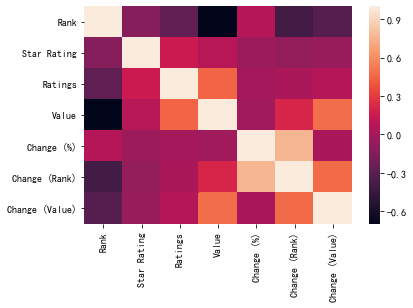

In [28]:
# 看看字段之间的线性相关性：相关性矩阵
## 从相关性矩阵中可以看出
### Rank 和 value的相关性最强，达到了-0.6左右
### Rating 和 Value的相关性达到了0.5左右
### 其它的字段要么是字段之间本身可以相互转换，要么就是不太相关

cols = [ 'Rank', 'Star Rating', 'Ratings', 'Value', 'Change (%)',
       'Change (Rank)', 'Change (Value)','App Release Date']
corr = Free_Rank_Wordwide_A[cols].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

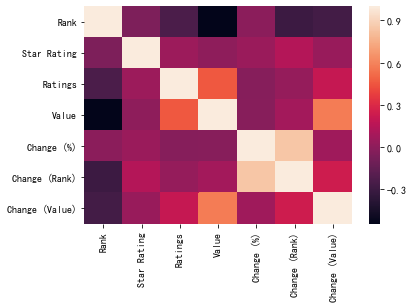

In [29]:
# 看看字段之间的相关性：相关性矩阵
## 同上
cols = [ 'Rank', 'Star Rating', 'Ratings', 'Value', 'Change (%)',
       'Change (Rank)', 'Change (Value)','App Release Date']
corr = Grossing_Rank_Wordwide[cols].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### 2.1 看分布 

In [30]:
# 看看数值字段的描述统计
Free_Rank_Wordwide_A.describe()

,App ID,Rank,Star Rating,Ratings,Value,Change (%),Change (Rank),Change (Value)
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,947.000000,730.000000,1.000000e+03
mean,9.329800e+14,500.500000,4.263680,1.525306e+06,8.493401e+06,955.318244,-46.034247,2.343621e+06
std,2.485093e+14,288.819436,0.257909,4.318292e+06,9.350780e+06,27851.440652,194.011695,6.790595e+06
min,2.060000e+13,1.000000,2.000000,2.163000e+03,2.552345e+06,-0.831800,-888.000000,-4.099337e+07
25%,1.000600e+15,250.750000,4.100000,7.613450e+04,3.514412e+06,0.018200,-137.250000,1.600725e+05
50%,1.000600e+15,500.500000,4.300000,2.790705e+05,5.282560e+06,0.275500,-30.000000,1.268033e+06
75%,1.000600e+15,750.250000,4.420000,1.089980e+06,9.204200e+06,0.913550,33.750000,3.228349e+06
max,1.000600e+15,1000.000000,4.860000,6.432725e+07,7.696858e+07,856983.666700,759.000000,7.364044e+07


Text(0, 0, '注释：数据为全球游戏市场Top1000')

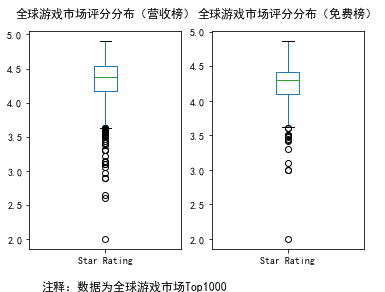

In [31]:
# Star Rating 数据分布对比（营收榜、免费榜）
plt.subplot(121)
plt.title("全球游戏市场评分分布（营收榜）",pad=15)
Grossing_Rank_Wordwide['Star Rating'].plot.box()
plt.subplot(122)
plt.title("全球游戏市场评分分布（免费榜）",pad=15)
Free_Rank_Wordwide_A['Star Rating'].plot.box() 
plt.annotate('注释：数据为全球游戏市场Top1000',
            xy=(0.1, 0), xytext=(0, 0),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=12, ha='right', va='bottom')

Text(0, 0, '注释：数据为全球游戏市场Top1000')

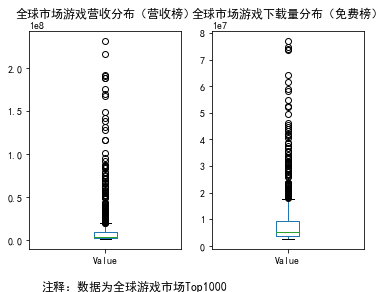

In [32]:
# 箱线图：Value 数据分布对比（营收榜、免费榜）
plt.subplot(121)
plt.title("全球市场游戏营收分布（营收榜）",pad=15)
Grossing_Rank_Wordwide['Value'].plot.box()
plt.subplot(122)
plt.title("全球市场游戏下载量分布（免费榜）",pad=15)
Free_Rank_Wordwide_A['Value'].plot.box() 
plt.annotate('注释：数据为全球游戏市场Top1000',
            xy=(0.1, 0), xytext=(0, 0),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=12, ha='right', va='bottom')

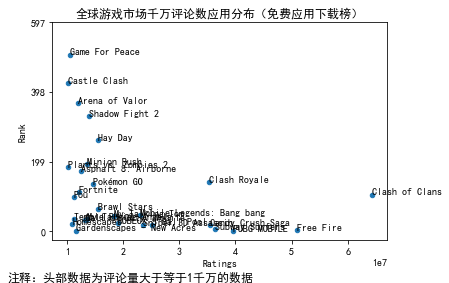

In [26]:
#  散点图（带标签）：Ratings和Rank
data = Free_Rank_Wordwide_A.query('Ratings>10000000')[['Ratings','Rank','App Name']]
yticks = range(min(data['Rank'])//125*100,max(data['Rank']*12//10),199)
title = '全球游戏市场千万评论数应用分布（免费应用下载榜）'
ax = data.plot(kind="scatter",x="Ratings",y="Rank",title =title,yticks=yticks)

# Now let's add your additional information
ax.annotate('注释：头部数据为评论量大于等于1千万的数据',
            xy=(0.6, 0), xytext=(0, 0),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=12, ha='right', va='bottom')
ax = data[['Ratings','Rank','App Name']].apply(lambda row: ax.text(*row),axis=1)

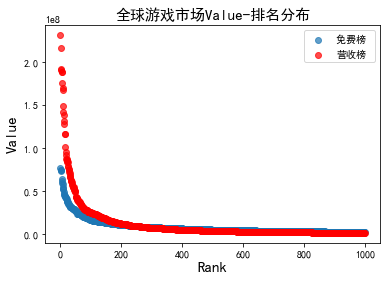

In [33]:
#  散点图：Value和Rank
data = Free_Rank_Wordwide_A[['Rank','Value','App Name']]
data2 = Grossing_Rank_Wordwide[['Rank','Value','App Name']]
title = '全球游戏市场Value-排名分布'
x =data['Rank']
y =data['Value']
x2 = data2['Rank']
y2 = data2['Value']

fig = plt.figure()
ax = plt.subplot()
ax.scatter(x, y, alpha=0.7)
ax.scatter(x2, y2, c='r', alpha=0.7)
ax.set_title(title, fontsize='15')
ax.set_ylabel('Value', fontsize='15')
ax.set_xlabel('Rank', fontsize='15')


plt.legend(labels=['免费榜 ','营收榜'])
plt.show()
 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


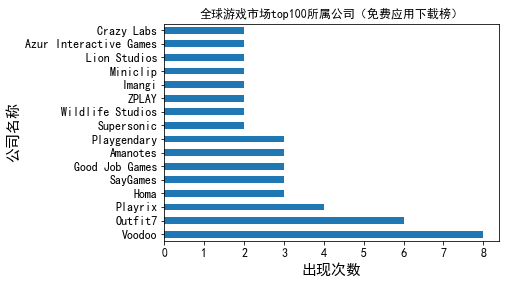

In [38]:
# 条形图（barh）：rank top100 归属公司排行
data_rank_top = Free_Rank_Wordwide_A.query("Rank<=100")
data_rank_top['Last_Rank'] = data_rank_top['Rank']+ data_rank_top['Change (Rank)']
data_rank_top_company =data_rank_top['Company Name'].value_counts()
data_rank_top_company_top =  data_rank_top_company[data_rank_top_company>=2]
title = '全球游戏市场top100所属公司（免费应用下载榜）'
ax = data_rank_top_company_top.plot(kind='barh',title=title)
ax.set_ylabel('公司名称', fontsize='15')
ax.set_xlabel('出现次数', fontsize='15')
ax.tick_params(labelsize=12)
# data_rank_top_company_top

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


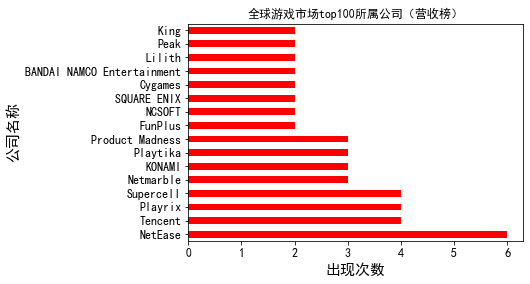

In [41]:
# 条形图（barh）：rank top100 归属公司排行
data_rank_top = Grossing_Rank_Wordwide.query("Rank<=100")
data_rank_top['Last_Rank'] = data_rank_top['Rank']+ data_rank_top['Change (Rank)']
data_rank_top_company =data_rank_top['Company Name'].value_counts()
data_rank_top_company_top =  data_rank_top_company[data_rank_top_company>=2]
title = '全球游戏市场top100所属公司（营收榜）'
ax = data_rank_top_company_top.plot(kind='barh',color='r',title=title)
ax.set_ylabel('公司名称', fontsize='15')
ax.set_xlabel('出现次数', fontsize='15')
ax.tick_params(labelsize=12)


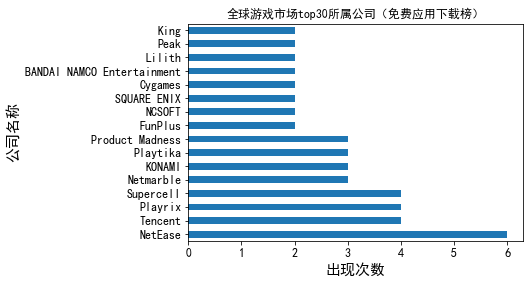

In [46]:
# 条形图（barh）：rank top30 归属公司排行
title = '全球游戏市场top30所属公司（免费应用下载榜）'
ax = data_rank_top_company_top.plot(kind='barh',title=title)
ax.set_ylabel('公司名称', fontsize='15')
ax.set_xlabel('出现次数', fontsize='15')
ax.tick_params(labelsize=12)

In [42]:
# 总部所在国家
data_rank_top['HQ Country'].value_counts()
data_rank_top_HQ =data_rank_top['HQ Country'].value_counts()
data_rank_top_HQ_top =  data_rank_top_HQ[data_rank_top_HQ>=2]

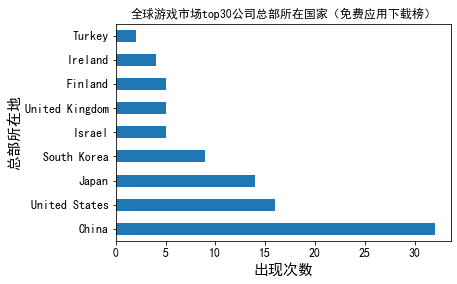

In [45]:
# 条形图（barh）：rank top30 归属公司的总部所在国家
title = '全球游戏市场top30公司总部所在国家（免费应用下载榜）'
ax = data_rank_top_HQ_top.plot(kind='barh',title=title)
ax.set_ylabel('总部所在地', fontsize='15')
ax.set_xlabel('出现次数', fontsize='15')
ax.tick_params(labelsize=12)

#### 2.3 看占比

<BarContainer object of 2 artists>

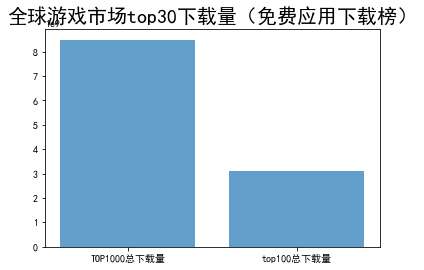

In [48]:
# 条形图（bar） 
categroy = ['TOP1000总下载量','top100总下载量']
download_data = [8493401304.0,3120014842.0]
 
y  =download_data    # 下载量
x = categroy  #类别

fig, ax = plt.subplots()
ax.set_title("全球游戏市场top30下载量（免费应用下载榜）", fontsize='20')

ax.bar(x, y, alpha=0.7)
# plt.show()

In [53]:
df

,Top250,Top1000
Grossing,8.912406e+09,1.148095e+10
Free,4.942409e+09,8.493401e+09


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, '全球游戏市场T250游戏营收/下载量和Top1000总量的关系')

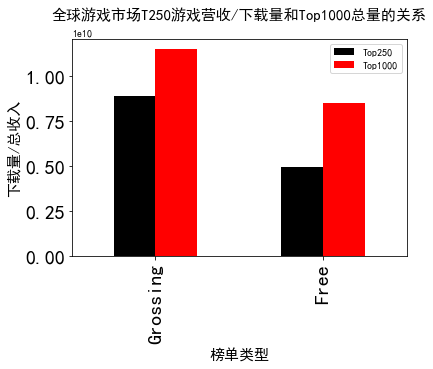

In [54]:
# 多类别条形图（bar）：Top250和Top1000Value的对比（分别计算后转成DataFrame格式，将细分类作为列）
# 加和
quantile3_G = Grossing_Rank_Wordwide['Value'].quantile(q=0.75)
quantile3_F = Free_Rank_Wordwide_A['Value'].quantile(q=0.75)
top25_G = np.sum(Grossing_Rank_Wordwide.query("Value>"+str(quantile3_G))['Value'])
top25_F = np.sum(Free_Rank_Wordwide_A.query("Value>"+str(quantile3_F))['Value'])

Free_All = np.sum(Free_Rank_Wordwide_A['Value'])
Grossing_All = np.sum(Grossing_Rank_Wordwide['Value'])
data1 = [top25_G,Grossing_All]
data2 = [top25_F,Free_All]
df = pd.DataFrame([data1,data2],columns=['Top250','Top1000'],index = ['Grossing','Free'])
title = "全球游戏市场T250游戏营收/下载量和Top1000总量的关系"

ylabel = '下载量/总收入'
xlabel = '榜单类型'

df.plot(kind='bar',color=['k','r'],fontsize=15)
ax = plt.axes()
ax.set_ylabel(ylabel, fontsize='15')
ax.set_xlabel(xlabel, fontsize='15')
ax.tick_params(labelsize=20)
ax.set_title(title, fontsize='15',pad=20)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, '全球游戏市场Top100游戏排名波动（免费榜）')

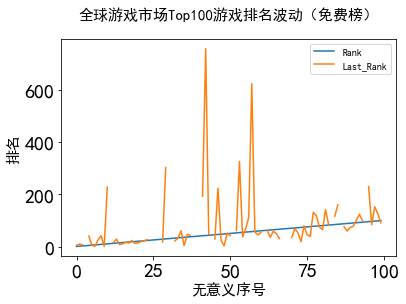

In [56]:
# 组合折线图：top100排名变化（取两列，直接绘图）
Grossing_Top_Rank = Grossing_Rank_Wordwide.query("Rank<=100")[['Rank','Change (Rank)']]
Free_Top_Rank = Free_Rank_Wordwide_A.query("Rank<=100")[['Rank','Change (Rank)']]

Grossing_Top_Rank['Last_Rank'] = Grossing_Top_Rank['Rank']+Grossing_Top_Rank['Change (Rank)']
Free_Top_Rank['Last_Rank'] = Free_Top_Rank['Rank']+Free_Top_Rank['Change (Rank)']

Free_Top_Rank[['Rank','Last_Rank']].plot()
title = "全球游戏市场Top100游戏排名波动（免费榜）"

ylabel = '排名'
xlabel = '无意义序号'

 
ax = plt.axes()
ax.set_ylabel(ylabel, fontsize='15')
ax.set_xlabel(xlabel, fontsize='15')
ax.tick_params(labelsize=20)
ax.set_title(title, fontsize='15',pad=20)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 1.0, '全球游戏市场Top100游戏排名波动（营收榜）')

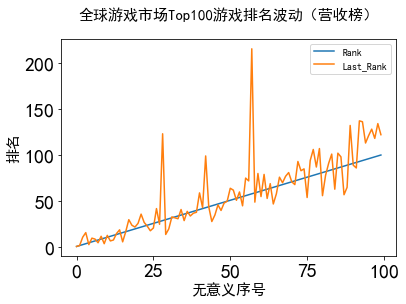

In [57]:
# 组合折线图：top100排名变化（取两列，直接绘图）
Grossing_Top_Rank[['Rank','Last_Rank']].reset_index( drop=True).plot()
title = "全球游戏市场Top100游戏排名波动（营收榜）"

ylabel = '排名'
xlabel = '无意义序号'

 
ax = plt.axes()
ax.set_ylabel(ylabel, fontsize='15')
ax.set_xlabel(xlabel, fontsize='15')
ax.tick_params(labelsize=20)
ax.set_title(title, fontsize='15',pad=20)

In [63]:
data_rank_top

,App Name,App ID,Rank,Star Rating,Ratings,Value,Change (%),Change (Rank),Change (Value),Unit,App IAP,App Release Date,Company Name,Parent Company Name,HQ Country
0,PUBG MOBILE,1.000600e+15,1,4.29,39586106,76968577.0,0.3723,5.0,20880125.0,Free App Downloads,True,2018-03-14,Tencent,Tencent,China
1,Gardenscapes - New Acres,1.000600e+15,2,4.35,11486882,74977975.0,0.6495,8.0,29522686.0,Free App Downloads,True,2016-06-04,Playrix,Playrix,Ireland
2,Free Fire,1.000600e+15,3,3.71,50919043,74056891.0,0.3339,4.0,18539627.0,Free App Downloads,True,2017-10-01,Garena Online,Sea,Singapore
3,Save The Girl,1.000600e+15,4,3.94,954917,73705394.0,1133.7496,NaN,73640441.0,Free App Downloads,True,2019-12-18,Lion Studios,AppLovin,United States
4,Ludo King,1.000600e+15,5,3.99,5310251,64145054.0,1.7774,36.0,41049491.0,Free App Downloads,True,2016-01-13,Gametion,Gametion,India
5,Subway Surfers,1.000600e+15,6,4.41,36266332,61544336.0,0.0902,-1.0,5092223.0,Free App Downloads,True,2012-05-24,Sybo,Sybo,Denmark
6,Brain Out,1.000600e+15,7,4.41,3858172,58988453.0,-0.2796,-5.0,-22889429.0,Free App Downloads,True,2019-08-18,Eyewind,Eyewind,China
7,Brain Test: Tricky Puzzles,1.000600e+15,8,4.66,3361156,58136129.0,1.0624,18.0,29947050.0,Free App Downloads,True,2019-11-12,Unico Studio,Unico Studio,United States
8,Fishdom: Deep Dive,1.000600e+15,9,4.26,5806057,54742511.0,1.3921,33.0,31858218.0,Free App Downloads,True,2013-02-07,Playrix,Playrix,Ireland
9,Hunter Assassin,1.000600e+15,10,4.35,1891585,52738332.0,-0.3705,-9.0,-31045716.0,Free App Downloads,True,2019-09-12,Ruby Game,Ruby Game,Turkey


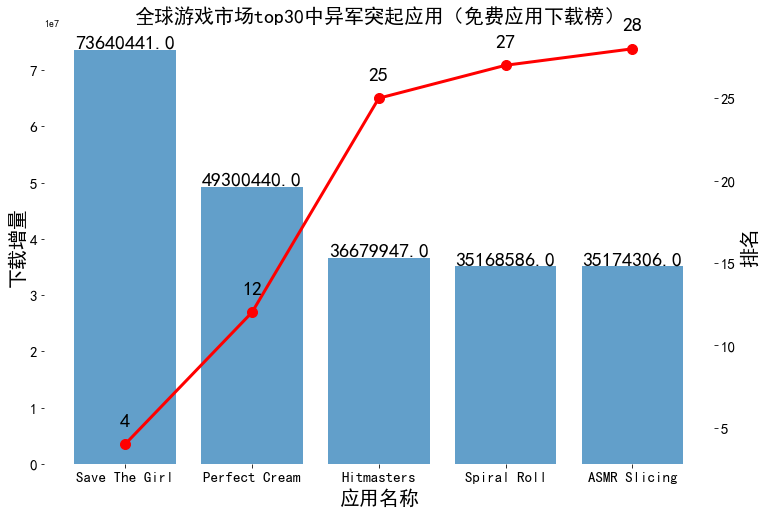

In [69]:
# 组合图（折线图、条形图）：Top30异军突起的游戏
data_rank_top = Free_Rank_Wordwide_A.query('Rank<=30')[Free_Rank_Wordwide_A.query('Rank<=30')['Change (Rank)'].isnull()][['App Name','Rank','Value','Change (Value)','Star Rating','Ratings','Company Name','Parent Company Name','HQ Country']]
y1 =data_rank_top['Change (Value)'].tolist() # 下载增量
y2 =data_rank_top['Rank']     #现在排名
x = data_rank_top['App Name']  
import matplotlib.pyplot as plt

# 设置图形大小
plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()


# 画柱形图
ax1 = fig.add_subplot(111)
# ax1.set_ylim([0, 4500])
# , color='k'
ax1.bar(x, y1, alpha=0.7)
ax1.set_ylabel(u'下载增量', fontsize='20')
ax1.set_xlabel(u'应用名称', fontsize='20')
ax1.tick_params(labelsize=15)
for i, (_x, _y) in enumerate(zip(x, y1)):
    plt.text(_x, _y, y1[i], color='black', fontsize=20, ha='center', va='bottom')  # 将数值显示在图形上
ax1.set_title("全球游戏市场top30中异军突起应用（免费应用下载榜）", fontsize='20')


# 画折线图
ax2 = ax1.twinx()  # 组合图必须加这个
# ax2.set_ylim([0, 35])      
ax2.plot(x, y2, 'r', ms=10, lw=3, marker='o') # 设置线粗细，节点样式
ax2.set_ylabel('排名', fontsize='20')
sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
ax2.tick_params(labelsize=15)
for x, y in zip(x, y2):   # # 添加数据标签
    plt.text(x, y+1, str(y), ha='center', va='bottom', fontsize=20, rotation=0)

# plt.savefig(r'F:\学习文档\20190723 数据可视化\1.png', dpi=1000, bbox_inches='tight')
plt.show()